# 线性回归算法

* 解决回归问题
* 思想简单，容易实现
* 许多强大的非线性模型的基础
* 结果具有很好的可解释性
* 蕴含机器学习中的很多重要思想

目标：找到 a 和 b，使得 $\sum\limits^m_{i=1}(y^{(i)}-ax^{(i)}-b)^2=J(a,b) $ 尽可能小

典型的最小二乘法问题：最小化误差的平方
$a={{\sum\limits^m_{i=1}(x^{(i)}-\overline{x})(y^{(i)}-\overline{y})}\over{\sum\limits^m_{i=1}(x^{(i)}-\overline{x})^2}},b=\overline{y}-a\overline{x}$

损失函数尽可能或者效用函数尽可能大。
通过分析问题，确定问题的损失函数。
通过最优化损失函数，获得机器学习模型。

最优化原理 --》凸优化

## 实现 Simple Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
x = np.array([1. ,2., 3., 4., 5.])
y = np.array([1., 3., 2., 3., 5.])

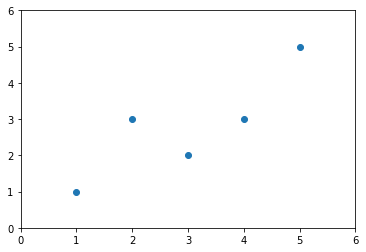

In [9]:
plt.scatter(x,y)
plt.axis([0,6,0,6])
plt.show()

In [10]:
x_mean = np.mean(x)
y_mean = np.mean(y)

In [11]:
num = 0.0 
d = 0.0 
for x_i, y_i in zip(x,y):
    num += (x_i - x_mean) * (y_i - y_mean)
    d += (x_i - x_mean) ** 2 
a = num / d
b = y_mean - a*x_mean

In [12]:
a

0.8

In [13]:
b

0.39999999999999947

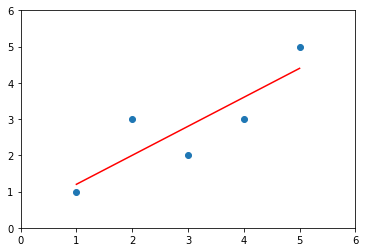

In [14]:
y_hat = a*x + b
plt.scatter(x,y)
plt.plot(x,y_hat, color='r')
plt.axis([0,6,0,6])
plt.show()

In [16]:
x_predict = 6
y_predict = a * x_predict + b
y_predict

5.2

## 向量化

## 衡量线性回归法的指标 MSE，RMSE，MAE

MSE(Mean Squared Error): $\frac 1m \sum \limits^m_{i=1}(y^{(i)}_{test}-\hat{y}^{(i)}_{test})^2$

RMSE(Root Mean Squared Error): $\sqrt{\frac 1m \sum \limits^m_{i=1}(y^{(i)}_{test}-\hat{y}^{(i)}_{test})^2}=\sqrt{MSE_{test}}$

MAE(Mean Absolute Error): $\frac 1m \sum \limits^m_{i=1}\vert y^{(i)}_{test}-\hat{y}^{(i)}_{test}\vert$

In [56]:
from sklearn import datasets

### 波士顿房产数据

In [57]:
boston = datasets.load_boston()
print(boston.DESCR)
# 取 RM

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [58]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [91]:
x = boston.data[:,5] #只使用房间数量特征

In [92]:
x.shape

(506,)

In [93]:
y = boston.target
y.shape

(506,)

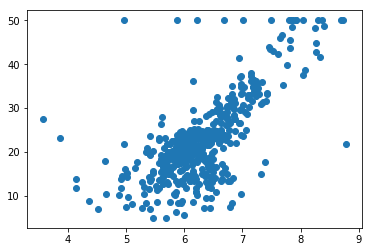

In [94]:
plt.scatter(x,y)
plt.show()

In [95]:
np.max(y)

50.0

In [96]:
x = x[y < 50.0]
y = y[y < 50.0]

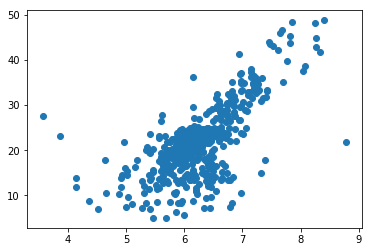

In [97]:
plt.scatter(x,y)
plt.show()

### 使用简单线性回归

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=520)

In [98]:
x_train.shape

(367,)

In [99]:
x_test.shape

(123,)

In [101]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(x_train.reshape(-1,1), y_train.reshape(-1,1))
y_predict = lin.predict(x_test.reshape(-1,1))

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [102]:
mean_absolute_error(y_test.reshape(-1,1), y_predict)

4.114070710076224

In [104]:
# 主要降低这个指标
mean_squared_error(y_test.reshape(-1,1), y_predict)

31.762010474692065